In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as gpd
#--- The followinf packages are used for geospatial analysis
from utils import * #We import our geocoding function-get_coord-from utils.py
import requests 
from tqdm import tqdm  
from bs4 import BeautifulSoup 
import json
import ast
import time 
import random

In [2]:
#First we create a dataFrame based on te file on resultadosInstantDataScrapper:
burgers_AMB = pd.read_csv("resultados_finales/amb_instantDataScrapper.csv")
burgers_AMB.tail()

,nombre_restaurante,tipo_restaurante,puntuacion,cantidad_comentarios,direccion_comercial,tipo_consumo,opciones,entrega,enlace,geocoding_address,coordenadas,latitude,longitude
400,Ulala Pizza,· Pizza,4.8,6.0,Carrera. 1C No21-05,NaN,NaN,NaN,https://lh5.googleusercontent.com/p/AF1QipMRPE...,"Carrera. 1C No21-05, Bucaramanga, Santander, C...","(7.1445627, -73.1330469)",7.144563,-73.133047
401,Aoki Sushi Rolls Piedecuesta,· Japonesa,4.6,77.0,"Carrera 15, Av. 10ª N No7BN-15",NaN,NaN,NaN,https://lh5.googleusercontent.com/p/AF1QipOtCt...,"Carrera 15, Av. 10ª N No7BN-15, Bucaramanga, S...","(7.1290655, -73.1298292)",7.129066,-73.129829
402,Restaurante San Martin,· · Restaurante,4.2,884.0,"Barrio San Rafael, Carrera 15 No13a - 35",NaN,NaN,NaN,https://lh5.googleusercontent.com/p/AF1QipMUo0...,"Barrio San Rafael, Carrera 15 No13a - 35, Buca...","(7.1439242, -73.129992)",7.143924,-73.129992
403,Pancha comida tradicional,· Ideal para familias,4.7,132.0,Calle 7 No6-55,NaN,NaN,NaN,https://lh5.googleusercontent.com/p/AF1QipOYh8...,"Calle 7 No6-55, Bucaramanga, Santander, Colombia","(7.1011052, -73.0968493)",7.101105,-73.096849
404,MAMBAS,· Hamburguesa,4.8,12.0,"Ruitoque condominio, Aldea comercial local 18",NaN,NaN,NaN,https://lh5.googleusercontent.com/p/AF1QipN_Yd...,"Ruitoque condominio, Aldea comercial local 18,...","(7.119349, -73.1227416)",7.119349,-73.122742


In [3]:
#Now we will create the column 'puntuacion_categories' based on 'puntuacion': we will apply the get_score_range() function on utils.py to the 'puntuacion' column:
burgers_AMB['categorias_puntuacion'] = burgers_AMB['puntuacion'].apply(get_score_range)
#Now let's visualize the last 5 rows:
burgers_AMB.tail()




,nombre_restaurante,tipo_restaurante,puntuacion,cantidad_comentarios,direccion_comercial,tipo_consumo,opciones,entrega,enlace,geocoding_address,coordenadas,latitude,longitude,categorias_puntuacion
400,Ulala Pizza,· Pizza,4.8,6.0,Carrera. 1C No21-05,NaN,NaN,NaN,https://lh5.googleusercontent.com/p/AF1QipMRPE...,"Carrera. 1C No21-05, Bucaramanga, Santander, C...","(7.1445627, -73.1330469)",7.144563,-73.133047,4.5-5.0
401,Aoki Sushi Rolls Piedecuesta,· Japonesa,4.6,77.0,"Carrera 15, Av. 10ª N No7BN-15",NaN,NaN,NaN,https://lh5.googleusercontent.com/p/AF1QipOtCt...,"Carrera 15, Av. 10ª N No7BN-15, Bucaramanga, S...","(7.1290655, -73.1298292)",7.129066,-73.129829,4.5-5.0
402,Restaurante San Martin,· · Restaurante,4.2,884.0,"Barrio San Rafael, Carrera 15 No13a - 35",NaN,NaN,NaN,https://lh5.googleusercontent.com/p/AF1QipMUo0...,"Barrio San Rafael, Carrera 15 No13a - 35, Buca...","(7.1439242, -73.129992)",7.143924,-73.129992,4.0-4.7
403,Pancha comida tradicional,· Ideal para familias,4.7,132.0,Calle 7 No6-55,NaN,NaN,NaN,https://lh5.googleusercontent.com/p/AF1QipOYh8...,"Calle 7 No6-55, Bucaramanga, Santander, Colombia","(7.1011052, -73.0968493)",7.101105,-73.096849,4.5-5.0
404,MAMBAS,· Hamburguesa,4.8,12.0,"Ruitoque condominio, Aldea comercial local 18",NaN,NaN,NaN,https://lh5.googleusercontent.com/p/AF1QipN_Yd...,"Ruitoque condominio, Aldea comercial local 18,...","(7.119349, -73.1227416)",7.119349,-73.122742,4.5-5.0


CHARTS:

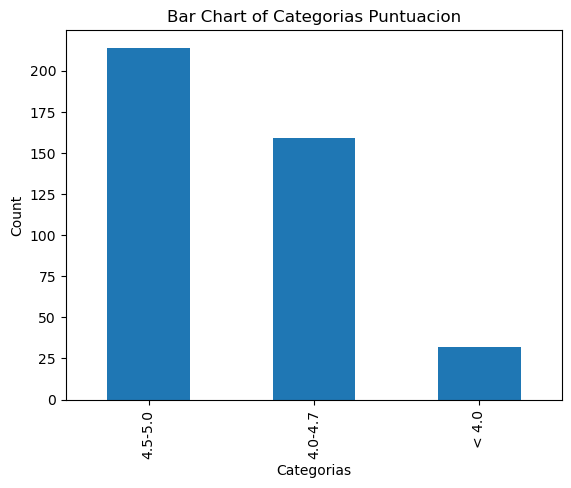

In [4]:
#Let's create a bar-char using the coluimn 'categorias_puntuacion'
burgers_AMB['categorias_puntuacion'].value_counts().plot(kind='bar')
plt.xlabel('Categorias')
plt.ylabel('Count')
plt.title('Bar Chart of Categorias Puntuacion')
plt.show()


Text(0.5, 1.0, 'Pie Chart of Categorias Puntuacion')

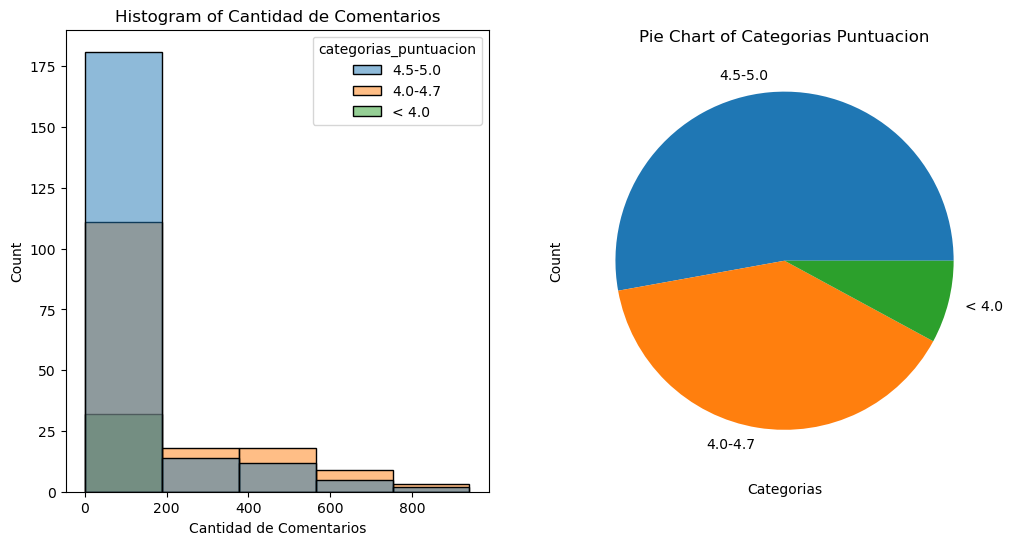

In [5]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

#Calculate a histogram using burgers_AMB['cantidad_comentarios']: use a histplot from seaborn
sns.histplot(data=burgers_AMB, x='cantidad_comentarios', ax=ax[0], bins=5, hue='categorias_puntuacion')
ax[0].set_xlabel('Cantidad de Comentarios')
ax[0].set_ylabel('Count')
ax[0].set_title('Histogram of Cantidad de Comentarios')


burgers_AMB['categorias_puntuacion'].value_counts().plot(kind='pie', ax=ax[1])
ax[1].set_xlabel('Categorias')
ax[1].set_ylabel('Count')
ax[1].set_title('Pie Chart of Categorias Puntuacion')



In [6]:
#turn burgers_AMB into a geopadnas geodataframe: use its columns 'latitude' and 'longitude' to create a geometry column	
burgers_AMB['geometry'] = gpd.points_from_xy(burgers_AMB['longitude'], burgers_AMB['latitude'])
gdf = gpd.GeoDataFrame(burgers_AMB, geometry='geometry')

Text(0.5, 1.0, 'Pie Chart of Categorias Puntuacion')

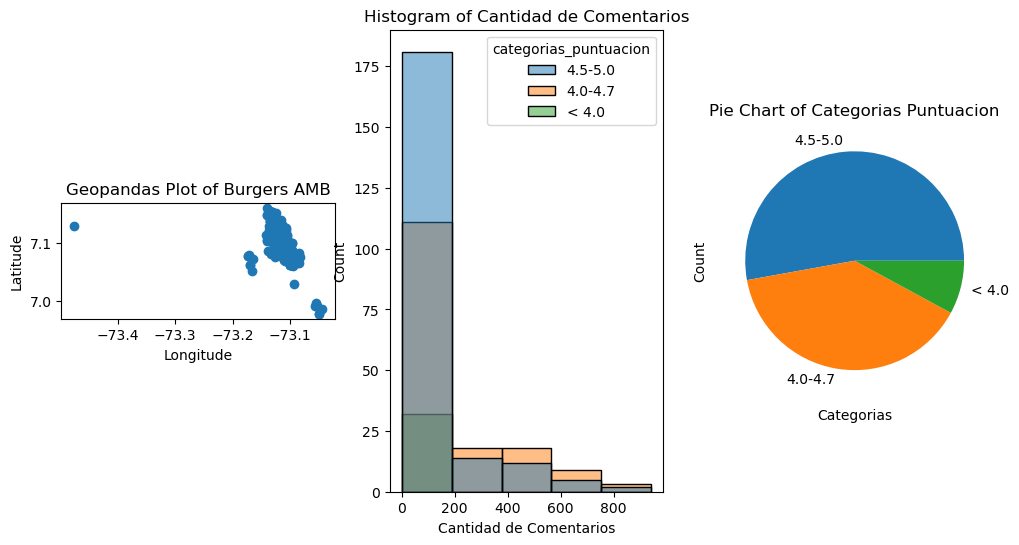

In [11]:
#plot both the histogram and the pie chart inside the element ax, along with the geographic coordinates:
fig, ax = plt.subplots(1, 3, figsize=(12, 6))
gdf.plot(ax=ax[0])
ax[0].set_title('Geopandas Plot of Burgers AMB')
ax[0].set_xlabel('Longitude')
ax[0].set_ylabel('Latitude')
sns.histplot(data=burgers_AMB, x='cantidad_comentarios', ax=ax[1], bins=5, hue='categorias_puntuacion')
ax[1].set_xlabel('Cantidad de Comentarios')
ax[1].set_ylabel('Count')
ax[1].set_title('Histogram of Cantidad de Comentarios')


burgers_AMB['categorias_puntuacion'].value_counts().plot(kind='pie', ax=ax[2])
ax[2].set_xlabel('Categorias')
ax[2].set_ylabel('Count')
ax[2].set_title('Pie Chart of Categorias Puntuacion')
